In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder

In [309]:
df = pd.read_csv('parsed.csv')
df.head(10)

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6,6,1,20.7,...,-1,18 м²,1 м²,79175096253,3 м,Серпухов,Крюкова,4,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1,9,1,33.0,...,-1,18 м²,6 м²,79645530086,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4,4,1,14.0,...,-1,-1,-1,79807126116,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5,5,1,17.5,...,-1,-1,-1,79645652380,-1,Серпухов,Российская,40,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4,7,1,25.9,...,-1,20 м²,5 м²,79099408093,"3,5 м",Серпухов,Химиков,8,NaN,NaN
5,Максим Юсов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/304233768/,Серпухов,sale,flat,2,3,1,46.7,...,-1,25 м²,6 м²,79647820594,-1,Серпухов,2-я Московская,6к3,NaN,NaN
6,ID 9655060,unknown,https://serpukhov.cian.ru/sale/flat/304697154/,Серпухов,sale,flat,3,5,1,29.0,...,-1,25 м²,-1,79645658245,3 м,Серпухов,Форсса,10,NaN,NaN
7,Этажи Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/304332318/,Серпухов,sale,flat,3,6,1,19.1,...,-1,-1,-1,79647821411,-1,Серпухов,Крюкова,4,NaN,NaN
8,Ольга Протченко,realtor,https://serpukhov.cian.ru/sale/flat/295915722/,Серпухов,sale,flat,1,2,1,27.1,...,-1,18 м²,6 м²,79671343432,"2,5 м",NaN,NaN,NaN,NaN,NaN
9,Глеб Маслов,realtor,https://serpukhov.cian.ru/sale/flat/304548494/,Серпухов,sale,flat,6,9,2,42.7,...,-1,"29,7 м²","5,6 м²",79150509841,"2,7 м",Серпухов,Весенняя,56,NaN,NaN


In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8393 entries, 0 to 8392
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   author                7592 non-null   object
 1   author_type           7595 non-null   object
 2   url                   7906 non-null   object
 3   location              7906 non-null   object
 4   deal_type             7906 non-null   object
 5   accommodation_type    7906 non-null   object
 6   floor                 7906 non-null   object
 7   floors_count          7906 non-null   object
 8   rooms_count           7906 non-null   object
 9   total_meters          7906 non-null   object
 10  price                 7893 non-null   object
 11  year_of_construction  7906 non-null   object
 12  object_type           7906 non-null   object
 13  have_loggia           7906 non-null   object
 14  parking_type          7906 non-null   object
 15  house_material_type   7906 non-null   

In [311]:
df.drop(columns=['author', 'author_type', 'deal_type', 'url', 'accommodation_type', 'phone', 'house_number', 'heating_type', 'have_loggia', 'house_material_type', 'finish_type'], inplace=True)
df = df.drop_duplicates()
df_clean = df.dropna(thresh=3)  

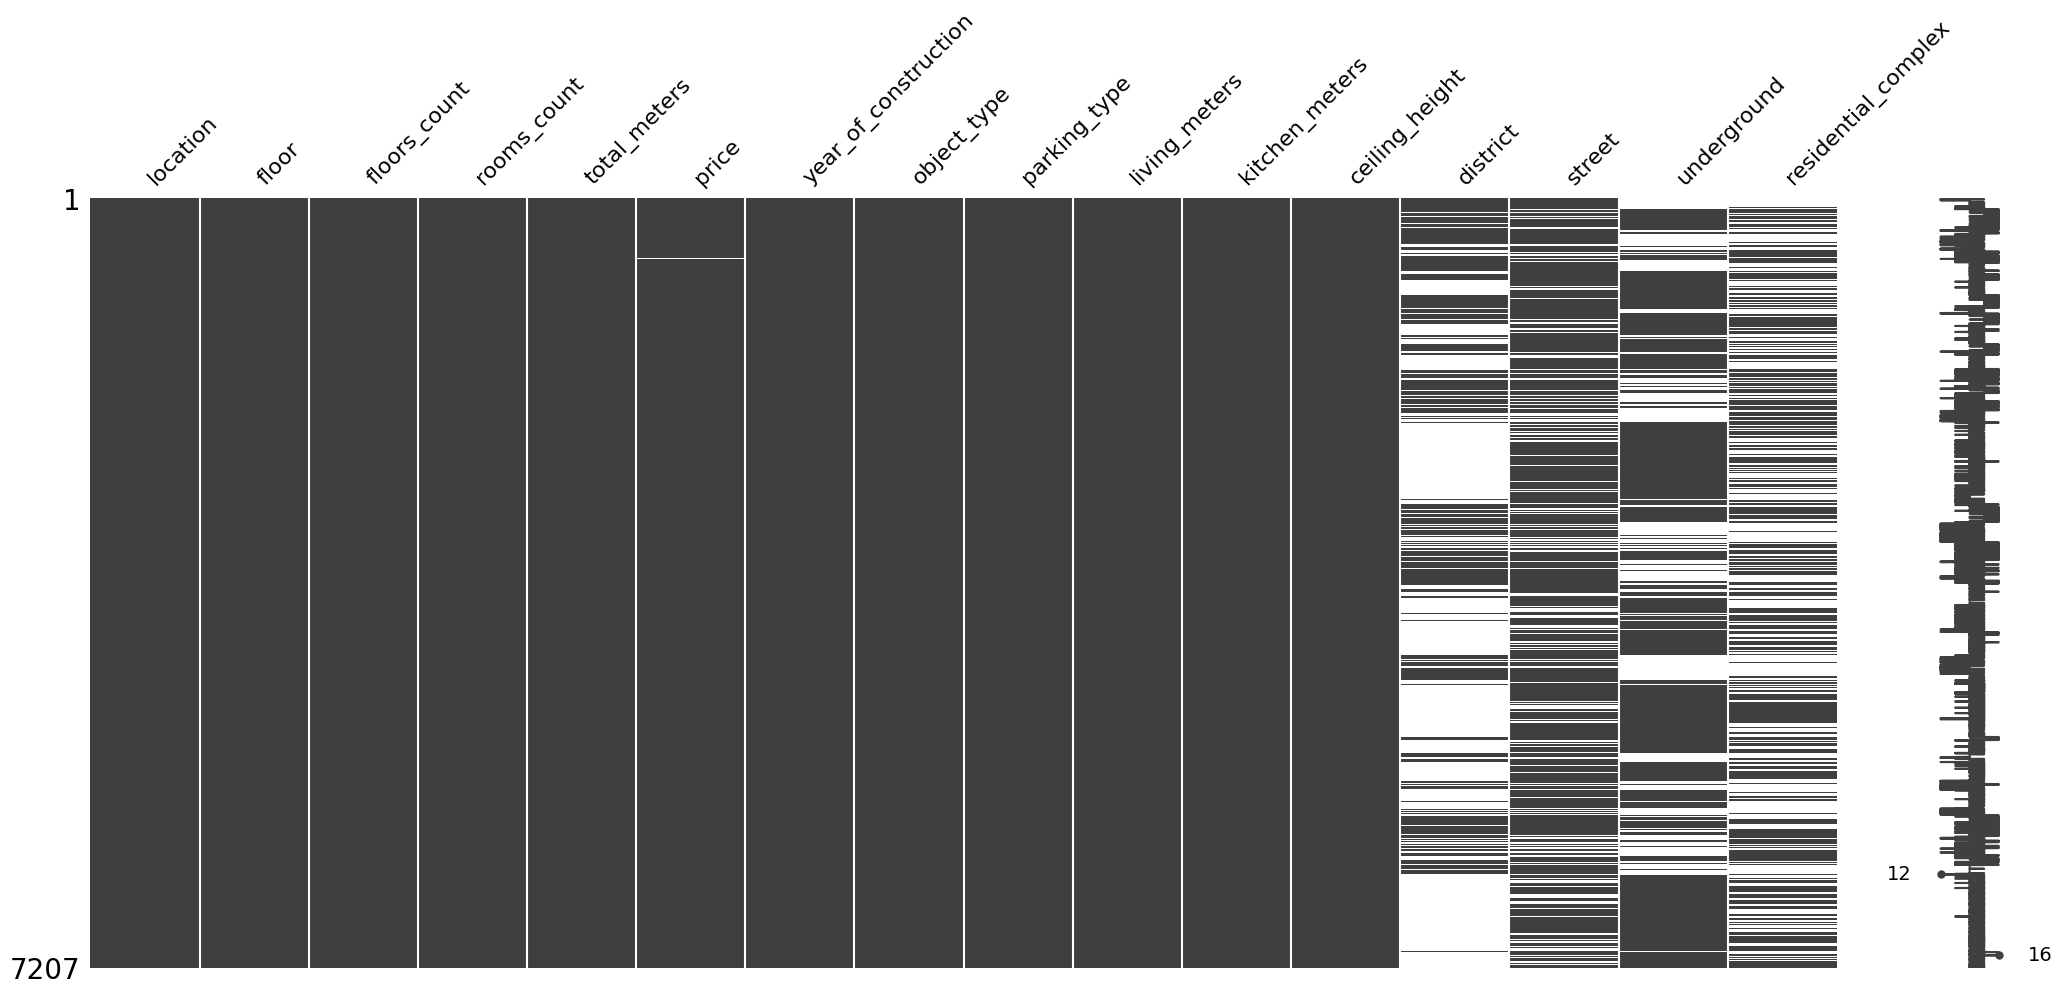

<Figure size 1000x500 with 0 Axes>

In [312]:
msno.matrix(df_clean)
plt.figure(figsize=(10,5))
plt.show()

In [313]:
df_clean.replace('-1', np.nan, inplace=True)

C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_10552\836098550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.replace('-1', np.nan, inplace=True)


In [314]:
# for column in df_clean.columns:
#     df_clean[column].fillna(df_clean[column].mode()[0], inplace=True)

In [315]:
df_clean.head(30)

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,parking_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex
0,Серпухов,6,6,1,20.7,2350000,1917,Вторичка,Наземная,18 м²,1 м²,3 м,Серпухов,Крюкова,NaN,NaN
1,Серпухов,1,9,1,33.0,4150000,1975,Вторичка,NaN,18 м²,6 м²,"2,7 м",NaN,Ворошилова,Аннино,NaN
2,Серпухов,4,4,1,14.0,1700000,NaN,Вторичка,NaN,NaN,NaN,NaN,Красный Текстильщик мкр,Красный Текстильщик,NaN,NaN
3,Серпухов,5,5,1,17.5,2500000,1968,Вторичка,NaN,NaN,NaN,NaN,Серпухов,Российская,NaN,NaN
4,Серпухов,4,7,1,25.9,3000000,2009,Вторичка,Наземная,20 м²,5 м²,"3,5 м",Серпухов,Химиков,NaN,NaN
5,Серпухов,2,3,1,46.7,6599999,NaN,Вторичка,NaN,25 м²,6 м²,NaN,Серпухов,2-я Московская,NaN,NaN
6,Серпухов,3,5,1,29.0,3350000,1917,Вторичка,Наземная,25 м²,NaN,3 м,Серпухов,Форсса,NaN,NaN
7,Серпухов,3,6,1,19.1,3600000,1917,Вторичка,NaN,NaN,NaN,NaN,Серпухов,Крюкова,NaN,NaN
8,Серпухов,1,2,1,27.1,1900000,1969,Вторичка,Наземная,18 м²,6 м²,"2,5 м",NaN,NaN,NaN,NaN
9,Серпухов,6,9,2,42.7,3990000,1980,Вторичка,Наземная,"29,7 м²","5,6 м²","2,7 м",Серпухов,Весенняя,NaN,NaN


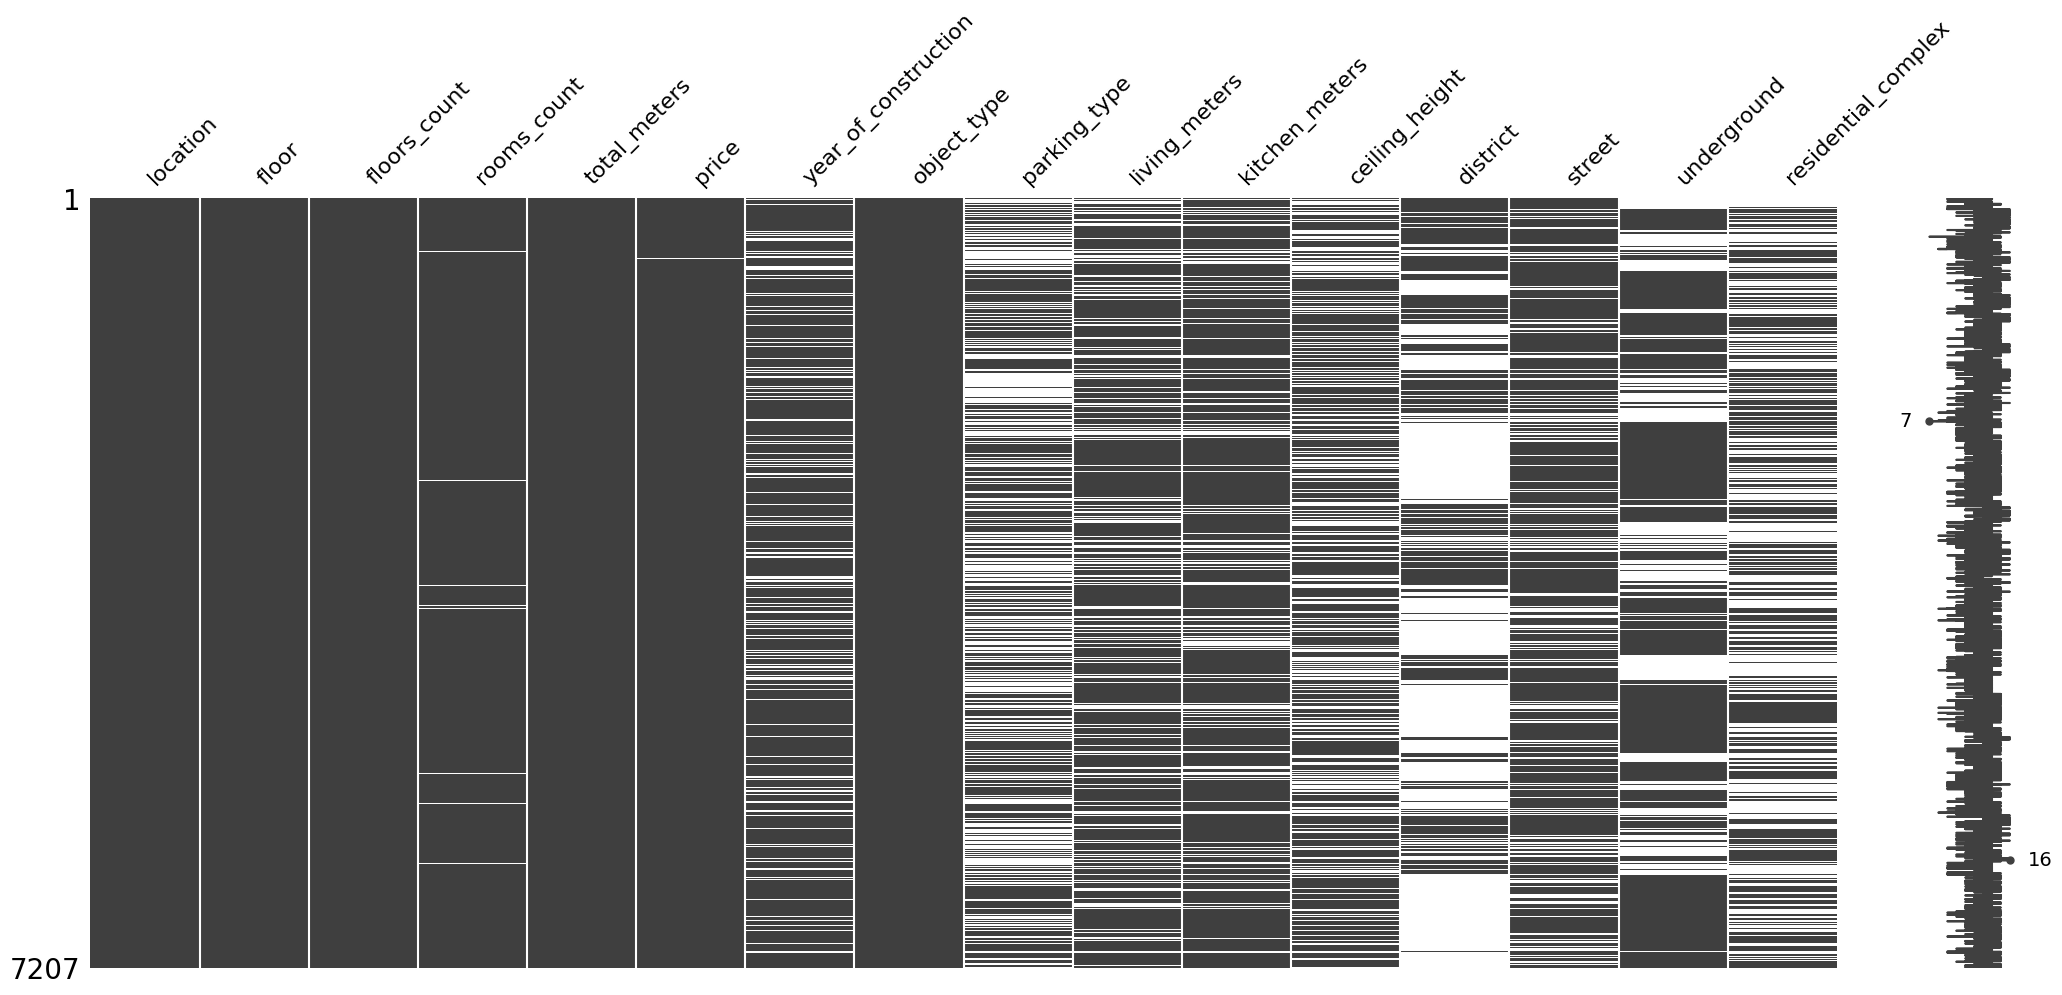

<Figure size 1000x500 with 0 Axes>

In [316]:
msno.matrix(df_clean)
plt.figure(figsize=(10,5))
plt.show()

In [317]:
df_clean['floor'].unique()

array(['6', '1', '4', '5', '2', '3', '15', '8', '7', '9', '18', '13',
       '10', '11', '35', '22', '12', '20', '14', '19', '37', '24', '28',
       '17', '34', '16', '40', '21', '41', '30', '33', '29', '23', '25',
       '26', '75', '62', '31', '46', '48', '80', '53', '38', '27', '57',
       '59', '32', '36', '47', '82', '39', '79', 'floor', '66', '60',
       '51'], dtype=object)

In [318]:
df_clean['floor'] = df_clean['floor'].replace('floor', '3')

C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_10552\1059912286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['floor'] = df_clean['floor'].replace('floor', '3')


In [319]:

df_clean['floor'] = df_clean['floor'].astype('int64')

C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_10552\3602364599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['floor'] = df_clean['floor'].astype('int64')


In [320]:
df_clean['floor'].unique()

array([ 6,  1,  4,  5,  2,  3, 15,  8,  7,  9, 18, 13, 10, 11, 35, 22, 12,
       20, 14, 19, 37, 24, 28, 17, 34, 16, 40, 21, 41, 30, 33, 29, 23, 25,
       26, 75, 62, 31, 46, 48, 80, 53, 38, 27, 57, 59, 32, 36, 47, 82, 39,
       79, 66, 60, 51])

In [321]:
df_clean['floors_count'].unique()

array(['6', '9', '4', '5', '7', '3', '2', '17', '10', '24', '1', '14',
       '18', '12', '23', '20', '41', '21', '43', '8', '59', '40', '27',
       '15', '13', '16', '22', '29', '25', '30', '49', '31', '39', '53',
       '28', '85', '35', '26', '32', '34', '57', '19', '11', '36', '68',
       '38', '51', '78', '79', '47', '33', '64', '75', '45', '37', '63',
       '95', '52', '54', '77', '46', '44', '67', '50', '48', '76', '42',
       '55', '56', '97', '65', 'floors_count', '66'], dtype=object)

In [322]:
df_clean['floors_count'].unique()

df_clean['floors_count'] = (df_clean['floors_count'].replace({'floors_count': '3', -1: np.nan}))

df_clean['floors_count'] = df_clean['floors_count'].astype(float)

mean_value = df_clean['floors_count'].mean()

df_clean['floors_count'] = df_clean['floors_count'].fillna(mean_value)

df_clean['floors_count'] = df_clean['floors_count'].astype('int64')

df_clean['floors_count'].unique()


C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_10552\2363612590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['floors_count'] = (df_clean['floors_count'].replace({'floors_count': '3', -1: np.nan}))
C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_10552\2363612590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['floors_count'] = df_clean['floors_count'].astype(float)
C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_10552\2363612590.py:9: SettingWithCopyWarning: 
A value is trying t

array([ 6,  9,  4,  5,  7,  3,  2, 17, 10, 24,  1, 14, 18, 12, 23, 20, 41,
       21, 43,  8, 59, 40, 27, 15, 13, 16, 22, 29, 25, 30, 49, 31, 39, 53,
       28, 85, 35, 26, 32, 34, 57, 19, 11, 36, 68, 38, 51, 78, 79, 47, 33,
       64, 75, 45, 37, 63, 95, 52, 54, 77, 46, 44, 67, 50, 48, 76, 42, 55,
       56, 97, 65, 66])

In [323]:
df_clean.head(30)

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,parking_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex
0,Серпухов,6,6,1,20.7,2350000,1917,Вторичка,Наземная,18 м²,1 м²,3 м,Серпухов,Крюкова,NaN,NaN
1,Серпухов,1,9,1,33.0,4150000,1975,Вторичка,NaN,18 м²,6 м²,"2,7 м",NaN,Ворошилова,Аннино,NaN
2,Серпухов,4,4,1,14.0,1700000,NaN,Вторичка,NaN,NaN,NaN,NaN,Красный Текстильщик мкр,Красный Текстильщик,NaN,NaN
3,Серпухов,5,5,1,17.5,2500000,1968,Вторичка,NaN,NaN,NaN,NaN,Серпухов,Российская,NaN,NaN
4,Серпухов,4,7,1,25.9,3000000,2009,Вторичка,Наземная,20 м²,5 м²,"3,5 м",Серпухов,Химиков,NaN,NaN
5,Серпухов,2,3,1,46.7,6599999,NaN,Вторичка,NaN,25 м²,6 м²,NaN,Серпухов,2-я Московская,NaN,NaN
6,Серпухов,3,5,1,29.0,3350000,1917,Вторичка,Наземная,25 м²,NaN,3 м,Серпухов,Форсса,NaN,NaN
7,Серпухов,3,6,1,19.1,3600000,1917,Вторичка,NaN,NaN,NaN,NaN,Серпухов,Крюкова,NaN,NaN
8,Серпухов,1,2,1,27.1,1900000,1969,Вторичка,Наземная,18 м²,6 м²,"2,5 м",NaN,NaN,NaN,NaN
9,Серпухов,6,9,2,42.7,3990000,1980,Вторичка,Наземная,"29,7 м²","5,6 м²","2,7 м",Серпухов,Весенняя,NaN,NaN


In [324]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7207 entries, 0 to 8392
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   location              7207 non-null   object
 1   floor                 7207 non-null   int64 
 2   floors_count          7207 non-null   int64 
 3   rooms_count           7114 non-null   object
 4   total_meters          7207 non-null   object
 5   price                 7194 non-null   object
 6   year_of_construction  5957 non-null   object
 7   object_type           7207 non-null   object
 8   parking_type          4039 non-null   object
 9   living_meters         5601 non-null   object
 10  kitchen_meters        6006 non-null   object
 11  ceiling_height        4675 non-null   object
 12  district              2869 non-null   object
 13  street                5716 non-null   object
 14  underground           5004 non-null   object
 15  residential_complex   3633 non-null   objec

In [325]:
df_clean['rooms_count'].unique()

df_clean['rooms_count'] = (df_clean['rooms_count'].replace({'rooms_count': '3', -1: np.nan}))

df_clean['rooms_count'] = df_clean['rooms_count'].astype(float)

mean_value = df_clean['rooms_count'].mean()

df_clean['rooms_count'] = df_clean['rooms_count'].fillna(mean_value)

df_clean['rooms_count'] = df_clean['rooms_count'].astype(int)

df_clean['rooms_count'].unique()



C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_10552\3361046204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['rooms_count'] = (df_clean['rooms_count'].replace({'rooms_count': '3', -1: np.nan}))
C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_10552\3361046204.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['rooms_count'] = df_clean['rooms_count'].astype(float)
C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_10552\3361046204.py:9: SettingWithCopyWarning: 
A value is trying to be 

array([1, 2, 3, 4, 5])

In [326]:
df_clean.head(30)

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,parking_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex
0,Серпухов,6,6,1,20.7,2350000,1917,Вторичка,Наземная,18 м²,1 м²,3 м,Серпухов,Крюкова,NaN,NaN
1,Серпухов,1,9,1,33.0,4150000,1975,Вторичка,NaN,18 м²,6 м²,"2,7 м",NaN,Ворошилова,Аннино,NaN
2,Серпухов,4,4,1,14.0,1700000,NaN,Вторичка,NaN,NaN,NaN,NaN,Красный Текстильщик мкр,Красный Текстильщик,NaN,NaN
3,Серпухов,5,5,1,17.5,2500000,1968,Вторичка,NaN,NaN,NaN,NaN,Серпухов,Российская,NaN,NaN
4,Серпухов,4,7,1,25.9,3000000,2009,Вторичка,Наземная,20 м²,5 м²,"3,5 м",Серпухов,Химиков,NaN,NaN
5,Серпухов,2,3,1,46.7,6599999,NaN,Вторичка,NaN,25 м²,6 м²,NaN,Серпухов,2-я Московская,NaN,NaN
6,Серпухов,3,5,1,29.0,3350000,1917,Вторичка,Наземная,25 м²,NaN,3 м,Серпухов,Форсса,NaN,NaN
7,Серпухов,3,6,1,19.1,3600000,1917,Вторичка,NaN,NaN,NaN,NaN,Серпухов,Крюкова,NaN,NaN
8,Серпухов,1,2,1,27.1,1900000,1969,Вторичка,Наземная,18 м²,6 м²,"2,5 м",NaN,NaN,NaN,NaN
9,Серпухов,6,9,2,42.7,3990000,1980,Вторичка,Наземная,"29,7 м²","5,6 м²","2,7 м",Серпухов,Весенняя,NaN,NaN


In [327]:
df_clean['rooms_count'].unique()

array([1, 2, 3, 4, 5])

In [328]:
df_clean['rooms_count'] = (df_clean['rooms_count'].replace(-1, np.nan))

df_clean['rooms_count'] = df_clean['rooms_count'].astype(float)

mean_value = df_clean['rooms_count'].mean()

df_clean['rooms_count'] = df_clean['rooms_count'].fillna(mean_value)

df_clean['rooms_count'] = df_clean['rooms_count'].astype('int64')

df_clean['rooms_count'].unique()

C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_10552\2995839078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['rooms_count'] = (df_clean['rooms_count'].replace(-1, np.nan))
C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_10552\2995839078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['rooms_count'] = df_clean['rooms_count'].astype(float)
C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_10552\2995839078.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

array([1, 2, 3, 4, 5])

In [329]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7207 entries, 0 to 8392
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   location              7207 non-null   object
 1   floor                 7207 non-null   int64 
 2   floors_count          7207 non-null   int64 
 3   rooms_count           7207 non-null   int64 
 4   total_meters          7207 non-null   object
 5   price                 7194 non-null   object
 6   year_of_construction  5957 non-null   object
 7   object_type           7207 non-null   object
 8   parking_type          4039 non-null   object
 9   living_meters         5601 non-null   object
 10  kitchen_meters        6006 non-null   object
 11  ceiling_height        4675 non-null   object
 12  district              2869 non-null   object
 13  street                5716 non-null   object
 14  underground           5004 non-null   object
 15  residential_complex   3633 non-null   objec

In [330]:
if (df_clean['total_meters'] == -1).any():
    print('У вас есть -1')
else:
    print('У вас нет -1')


У вас нет -1


In [331]:
if (df_clean['total_meters'] == str).any():
    print('У вас есть str')
else:
    print('У вас нет str')


У вас нет str


In [332]:
df_clean['total_meters'] = pd.to_numeric(df_clean['total_meters'], errors='coerce').astype('float64')


C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_10552\54468129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['total_meters'] = pd.to_numeric(df_clean['total_meters'], errors='coerce').astype('float64')


In [333]:
df_clean['total_meters'].unique()

array([20.7 , 33.  , 14.  , ..., 30.47, 36.79, 48.39])

In [334]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7207 entries, 0 to 8392
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7207 non-null   object 
 1   floor                 7207 non-null   int64  
 2   floors_count          7207 non-null   int64  
 3   rooms_count           7207 non-null   int64  
 4   total_meters          7206 non-null   float64
 5   price                 7194 non-null   object 
 6   year_of_construction  5957 non-null   object 
 7   object_type           7207 non-null   object 
 8   parking_type          4039 non-null   object 
 9   living_meters         5601 non-null   object 
 10  kitchen_meters        6006 non-null   object 
 11  ceiling_height        4675 non-null   object 
 12  district              2869 non-null   object 
 13  street                5716 non-null   object 
 14  underground           5004 non-null   object 
 15  residential_complex   3633

In [335]:
df_clean['price'] = pd.to_numeric(df_clean['price'], errors='coerce')

df_clean['price'] = df_clean['price'].astype(float)

mean_value = df_clean['price'].mean()

df_clean['price'] = df_clean['price'].fillna(mean_value)

df_clean['price'] = df_clean['price'].astype('int64')

df_clean['price'].unique()


C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_10552\4098315704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price'] = pd.to_numeric(df_clean['price'], errors='coerce')
C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_10552\4098315704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price'] = df_clean['price'].astype(float)
C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_10552\4098315704.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

array([ 2350000,  4150000,  1700000, ...,  9865233,  8607014, 13014356])

In [336]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7207 entries, 0 to 8392
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7207 non-null   object 
 1   floor                 7207 non-null   int64  
 2   floors_count          7207 non-null   int64  
 3   rooms_count           7207 non-null   int64  
 4   total_meters          7206 non-null   float64
 5   price                 7207 non-null   int64  
 6   year_of_construction  5957 non-null   object 
 7   object_type           7207 non-null   object 
 8   parking_type          4039 non-null   object 
 9   living_meters         5601 non-null   object 
 10  kitchen_meters        6006 non-null   object 
 11  ceiling_height        4675 non-null   object 
 12  district              2869 non-null   object 
 13  street                5716 non-null   object 
 14  underground           5004 non-null   object 
 15  residential_complex   3633

In [337]:
duplicates = df_clean.duplicated().sum()
print("Количество дубликатов в DataFrame:", duplicates)
df_clean = df_clean.drop_duplicates()


Количество дубликатов в DataFrame: 1


In [338]:
label_encoder = LabelEncoder()

df_clean['location'] = label_encoder.fit_transform(df_clean['location'])
df_clean['location'] = label_encoder.fit_transform(df_clean['location']).astype("int64")
df_clean['residential_complex'] = label_encoder.fit_transform(df_clean['residential_complex'])
df_clean['residential_complex'] = label_encoder.fit_transform(df_clean['residential_complex']).astype("int64")
df_clean['underground'] = label_encoder.fit_transform(df_clean['underground'])
df_clean['underground'] = label_encoder.fit_transform(df_clean['underground']).astype("int64")
df_clean['street'] = label_encoder.fit_transform(df_clean['street'])
df_clean['street'] = label_encoder.fit_transform(df_clean['street']).astype("int64")
df_clean['district'] = label_encoder.fit_transform(df_clean['district'])
df_clean['district'] = label_encoder.fit_transform(df_clean['district']).astype("int64")

In [339]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7206 entries, 0 to 8392
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7206 non-null   int64  
 1   floor                 7206 non-null   int64  
 2   floors_count          7206 non-null   int64  
 3   rooms_count           7206 non-null   int64  
 4   total_meters          7205 non-null   float64
 5   price                 7206 non-null   int64  
 6   year_of_construction  5957 non-null   object 
 7   object_type           7206 non-null   object 
 8   parking_type          4038 non-null   object 
 9   living_meters         5601 non-null   object 
 10  kitchen_meters        6005 non-null   object 
 11  ceiling_height        4675 non-null   object 
 12  district              7206 non-null   int64  
 13  street                7206 non-null   int64  
 14  underground           7206 non-null   int64  
 15  residential_complex   7206

In [340]:
df_clean['year_of_construction'].unique()

array(['1917', '1975', nan, '1968', '2009', '1969', '1980', '1990',
       '1964', '2025', '2015', '1970', '1984', '1965', '2010', 'Аукцион',
       '1992', '2011', '1986', '1994', '1956', '1966', '1973', '1971',
       '1957', '2013', '1981', '1972', '1959', '2004', '1962', '2019',
       '1978', '1977', '2003', '1963', '1952', '2024', '2007', '1995',
       '1976', '1982', '1953', '2008', '2026', '2023', '1941', '2028',
       '1993', '2016', '2027', '2017', '2022', '1932', '2012', '1960',
       '2006', '1926', '2020', '1943', '2014', '2021', '1967', '1904',
       '1991', '2018', '1987', '1988', '1974', 'Напишите автору', '1979',
       '1929', '1989', '1985', '1930', '2005', '1958', '1996', '1940',
       '1948', '1961', '1938', '1997', '2002', '2001', '1999', '1983',
       '1998', '1902', '2000', '1915', '1910', '1939', '1954', '1897',
       '1955', '1900', 'Позвоните автору', '1949', '1947', '1901', '1909',
       '1600', '1951', '1936', 'year_of_construction', '1931', '1950',

In [341]:

df_clean = df_clean[df_clean['year_of_construction'] != -1]
df_clean['year_of_construction'] = df_clean['year_of_construction'].replace({
    '-1': np.nan,
    'year_of_construction': np.nan, 
    'Аукцион': np.nan, 
    'Напишите автору': np.nan, 
    'Позвоните автору': np.nan
})
df_clean['year_of_construction'] = df_clean['year_of_construction'].astype(float)

mean_value = df_clean['year_of_construction'].mean()

df_clean['year_of_construction'] = df_clean['year_of_construction'].fillna(mean_value)

df_clean['year_of_construction'] = df_clean['year_of_construction'].astype('int64')

df_clean['year_of_construction'].unique()

array([1917, 1975, 2006, 1968, 2009, 1969, 1980, 1990, 1964, 2025, 2015,
       1970, 1984, 1965, 2010, 1992, 2011, 1986, 1994, 1956, 1966, 1973,
       1971, 1957, 2013, 1981, 1972, 1959, 2004, 1962, 2019, 1978, 1977,
       2003, 1963, 1952, 2024, 2007, 1995, 1976, 1982, 1953, 2008, 2026,
       2023, 1941, 2028, 1993, 2016, 2027, 2017, 2022, 1932, 2012, 1960,
       1926, 2020, 1943, 2014, 2021, 1967, 1904, 1991, 2018, 1987, 1988,
       1974, 1979, 1929, 1989, 1985, 1930, 2005, 1958, 1996, 1940, 1948,
       1961, 1938, 1997, 2002, 2001, 1999, 1983, 1998, 1902, 2000, 1915,
       1910, 1939, 1954, 1897, 1955, 1900, 1949, 1947, 1901, 1909, 1600,
       1951, 1936, 1931, 1950, 1934, 1928, 1945, 1937, 1927, 1896, 1777,
       2031, 1935])

In [342]:
df_clean['object_type'].unique()

array(['Вторичка', 'Новостройка', 'Вторичка / Апартаменты',
       'Новостройка / Апартаменты', 'Вторичка / Пентхаус',
       'Новостройка / Пентхаус', 'object_type'], dtype=object)

In [343]:
df_clean['object_type'] = label_encoder.fit_transform(df_clean['object_type'])
df_clean['object_type'] = label_encoder.fit_transform(df_clean['object_type']).astype("int64")

In [344]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7206 entries, 0 to 8392
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7206 non-null   int64  
 1   floor                 7206 non-null   int64  
 2   floors_count          7206 non-null   int64  
 3   rooms_count           7206 non-null   int64  
 4   total_meters          7205 non-null   float64
 5   price                 7206 non-null   int64  
 6   year_of_construction  7206 non-null   int64  
 7   object_type           7206 non-null   int64  
 8   parking_type          4038 non-null   object 
 9   living_meters         5601 non-null   object 
 10  kitchen_meters        6005 non-null   object 
 11  ceiling_height        4675 non-null   object 
 12  district              7206 non-null   int64  
 13  street                7206 non-null   int64  
 14  underground           7206 non-null   int64  
 15  residential_complex   7206

In [345]:
df_clean['parking_type'].unique()

array(['Наземная', nan, 'Многоуровневая', 'Подземная', 'Открытая',
       'parking_type'], dtype=object)

In [346]:
df_clean = df_clean[df_clean['parking_type'] != '-1']

df_clean['parking_type'] = df_clean['parking_type'].replace({'-1': np.nan, 'parking_type': np.nan})

label_encoder = LabelEncoder()
df_clean['parking_type'] = label_encoder.fit_transform(df_clean['parking_type'].astype(str))


In [347]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7206 entries, 0 to 8392
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7206 non-null   int64  
 1   floor                 7206 non-null   int64  
 2   floors_count          7206 non-null   int64  
 3   rooms_count           7206 non-null   int64  
 4   total_meters          7205 non-null   float64
 5   price                 7206 non-null   int64  
 6   year_of_construction  7206 non-null   int64  
 7   object_type           7206 non-null   int64  
 8   parking_type          7206 non-null   int64  
 9   living_meters         5601 non-null   object 
 10  kitchen_meters        6005 non-null   object 
 11  ceiling_height        4675 non-null   object 
 12  district              7206 non-null   int64  
 13  street                7206 non-null   int64  
 14  underground           7206 non-null   int64  
 15  residential_complex   7206

In [348]:
df_clean['living_meters'].unique()

array(['18\xa0м²', nan, '20\xa0м²', '25\xa0м²', '29,7\xa0м²',
       '24,9\xa0м²', '13,4\xa0м²', '14,1\xa0м²', '28\xa0м²', '15\xa0м²',
       '19\xa0м²', '16\xa0м²', '40\xa0м²', '45\xa0м²', '50\xa0м²',
       '44\xa0м²', '39\xa0м²', '41\xa0м²', '32,5\xa0м²', '27,4\xa0м²',
       '17\xa0м²', '33\xa0м²', '27\xa0м²', '34\xa0м²', '30\xa0м²',
       '30,7\xa0м²', '29\xa0м²', '38\xa0м²', '28,9\xa0м²', '26\xa0м²',
       '18,1\xa0м²', '13\xa0м²', '18,2\xa0м²', '9\xa0м²', '14\xa0м²',
       '11,4\xa0м²', '19,3\xa0м²', '20,7\xa0м²', '32\xa0м²', '28,6\xa0м²',
       '41,5\xa0м²', '31,2\xa0м²', '56,5\xa0м²', '48,8\xa0м²', '37\xa0м²',
       '50,5\xa0м²', '37,7\xa0м²', '39,4\xa0м²', '52\xa0м²', '52,1\xa0м²',
       '39,1\xa0м²', '35,2\xa0м²', '69\xa0м²', '35,7\xa0м²', '36,1\xa0м²',
       '23,4\xa0м²', '26,8\xa0м²', '18,8\xa0м²', '45,8\xa0м²',
       '32,8\xa0м²', '6,3\xa0м²', '10,5\xa0м²', '28,2\xa0м²',
       '13,5\xa0м²', '15,2\xa0м²', '10,3\xa0м²', '12,8\xa0м²',
       '70,9\xa0м²', '46,6\xa0м

In [349]:
# Заменяем 'м²', '\xa0' и '-1' на NaN в living_meters
df_clean['living_meters'] = (
    df_clean['living_meters']
    .replace({'м²': '', '\xa0': '', '-1': np.nan}, regex=True)
)

# Преобразуем значения в числовой формат
df_clean['living_meters'] = pd.to_numeric(df_clean['living_meters'], errors='coerce')

# Рассчитываем среднее значение по столбцу, игнорируя NaN
mean_value_living = df_clean['living_meters'].mean()

# Заполняем NaN средним значением
df_clean['living_meters'].fillna(mean_value_living, inplace=True)

# Переводим столбец в целочисленный формат
df_clean['living_meters'] = df_clean['living_meters'].astype(int)

print(df_clean['living_meters'].head(10))


0    18
1    18
2    28
3    28
4    20
5    25
6    25
7    28
8    18
9    28
Name: living_meters, dtype: int64


C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_10552\2872729684.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['living_meters'].fillna(mean_value_living, inplace=True)


In [350]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7206 entries, 0 to 8392
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7206 non-null   int64  
 1   floor                 7206 non-null   int64  
 2   floors_count          7206 non-null   int64  
 3   rooms_count           7206 non-null   int64  
 4   total_meters          7205 non-null   float64
 5   price                 7206 non-null   int64  
 6   year_of_construction  7206 non-null   int64  
 7   object_type           7206 non-null   int64  
 8   parking_type          7206 non-null   int64  
 9   living_meters         7206 non-null   int64  
 10  kitchen_meters        6005 non-null   object 
 11  ceiling_height        4675 non-null   object 
 12  district              7206 non-null   int64  
 13  street                7206 non-null   int64  
 14  underground           7206 non-null   int64  
 15  residential_complex   7206

In [351]:
df_clean['kitchen_meters'].unique()

array(['1\xa0м²', '6\xa0м²', nan, '5\xa0м²', '5,6\xa0м²', '16\xa0м²',
       '3\xa0м²', '6,2\xa0м²', '7\xa0м²', '7,3\xa0м²', '6,1\xa0м²',
       '10\xa0м²', '9\xa0м²', '8\xa0м²', '5,7\xa0м²', '11\xa0м²',
       '7,5\xa0м²', '13,5\xa0м²', '6,5\xa0м²', '5,8\xa0м²', '20\xa0м²',
       '11,2\xa0м²', '7,8\xa0м²', '4\xa0м²', '7,9\xa0м²', '4,1\xa0м²',
       '12\xa0м²', '7,7\xa0м²', '8,1\xa0м²', '9,3\xa0м²', '10,2\xa0м²',
       '10,6\xa0м²', '8,5\xa0м²', '9,1\xa0м²', '4,5\xa0м²', '6,7\xa0м²',
       '45\xa0м²', '34,3\xa0м²', '25,5\xa0м²', '46,2\xa0м²', '4,9\xa0м²',
       '8,4\xa0м²', '24,9\xa0м²', '15\xa0м²', '15,8\xa0м²', '11,5\xa0м²',
       '5,5\xa0м²', '10,7\xa0м²', '19,4\xa0м²', '43,8\xa0м²',
       '44,5\xa0м²', '22,4\xa0м²', '25\xa0м²', '28,4\xa0м²', '19\xa0м²',
       '21\xa0м²', '5,1\xa0м²', '18,3\xa0м²', '3,8\xa0м²', '19,2\xa0м²',
       '16,2\xa0м²', '21,7\xa0м²', '12,5\xa0м²', '15,4\xa0м²', '28\xa0м²',
       '17\xa0м²', '10,4\xa0м²', '13,6\xa0м²', '21,8\xa0м²', '14\xa0м²',
    

In [352]:
# Заменяем 'м²', '\xa0' и '-1' на NaN
df_clean['kitchen_meters'] = (
    df_clean['kitchen_meters']
    .replace({'м²': '', '\xa0': '', '-1': np.nan}, regex=True)
)

# Преобразуем значения в числовой формат
df_clean['kitchen_meters'] = pd.to_numeric(df_clean['kitchen_meters'], errors='coerce')

# Рассчитываем среднее значение по столбцу kitchen_meters, игнорируя NaN
mean_value = df_clean['kitchen_meters'].mean()

# Заполняем NaN средним значением
df_clean['kitchen_meters'].fillna(mean_value, inplace=True)

df_clean['kitchen_meters'] = df_clean['kitchen_meters'].astype(int)

print(df_clean['kitchen_meters'].head(10))


0     1
1     6
2    10
3    10
4     5
5     6
6    10
7    10
8     6
9    10
Name: kitchen_meters, dtype: int64


C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_10552\2481462560.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['kitchen_meters'].fillna(mean_value, inplace=True)


In [353]:
df_clean['kitchen_meters'].unique()

array([ 1,  6, 10,  5, 16,  3,  7,  9,  8, 11, 20,  4, 12, 45, 15, 25, 19,
       21, 28, 17, 14, 13, 23, 18, 43, 65,  2, 24, 22, 30, 26, 27, 31, 38,
       50, 74, 33, 34, 35, 32, 55, 36, 40, 90, 46, 52])

In [354]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7206 entries, 0 to 8392
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7206 non-null   int64  
 1   floor                 7206 non-null   int64  
 2   floors_count          7206 non-null   int64  
 3   rooms_count           7206 non-null   int64  
 4   total_meters          7205 non-null   float64
 5   price                 7206 non-null   int64  
 6   year_of_construction  7206 non-null   int64  
 7   object_type           7206 non-null   int64  
 8   parking_type          7206 non-null   int64  
 9   living_meters         7206 non-null   int64  
 10  kitchen_meters        7206 non-null   int64  
 11  ceiling_height        4675 non-null   object 
 12  district              7206 non-null   int64  
 13  street                7206 non-null   int64  
 14  underground           7206 non-null   int64  
 15  residential_complex   7206

In [355]:
df_clean['ceiling_height'].unique()

array(['3\xa0м', '2,7\xa0м', nan, '3,5\xa0м', '2,5\xa0м', '2,9\xa0м',
       '2,8\xa0м', '2,4\xa0м', '2,6\xa0м', '2,65\xa0м', '2,73\xa0м',
       '4,6\xa0м', '3,25\xa0м', '2,85\xa0м', '3,2\xa0м', '2,64\xa0м',
       '3,6\xa0м', '3,06\xa0м', '3,1\xa0м', '3,15\xa0м', '3,35\xa0м',
       '2,92\xa0м', '3,12\xa0м', '5\xa0м', '3,3\xa0м', '2,87\xa0м',
       '2,95\xa0м', '2,82\xa0м', '2,99\xa0м', '3,08\xa0м', '3,4\xa0м',
       '3,27\xa0м', '2,75\xa0м', '3,9\xa0м', '6\xa0м', '3,43\xa0м',
       '2,51\xa0м', '3,05\xa0м', '2,78\xa0м', '5,2\xa0м', '2,72\xa0м',
       '2,63\xa0м', '2,62\xa0м', '2,89\xa0м', '2,68\xa0м', '2,66\xa0м',
       '3,09\xa0м', '2,55\xa0м', '2,84\xa0м', '2,48\xa0м', '4\xa0м',
       '2,67\xa0м', '2,74\xa0м', '3,59\xa0м', '3,04\xa0м', '2,56\xa0м',
       '2\xa0м', '2,42\xa0м', '3,02\xa0м', '3,26\xa0м', '4,5\xa0м',
       '5,7\xa0м', '3,23\xa0м', '3,14\xa0м', '3,65\xa0м', '3,03\xa0м',
       '3,24\xa0м', '2,77\xa0м', '4,2\xa0м', '3,55\xa0м', '2,57\xa0м',
       '3,31\xa0м', 

In [356]:
# Удаление лишних символов и пробелов
df_clean['ceiling_height'] = (
    df_clean['ceiling_height']
    .str.strip()  # Убираем пробелы с краев
    .replace({'\xa0м': '', '-1': np.nan, 'ceiling_height': np.nan}, regex=True)
)

# Преобразование к числовому формату с заменой на NaN в случае ошибок
df_clean['ceiling_height'] = pd.to_numeric(df_clean['ceiling_height'], errors='coerce')

# Заполнение NaN средним значением
mean_value = df_clean['ceiling_height'].mean()
df_clean['ceiling_height'].fillna(mean_value, inplace=True)

# Преобразование к int
df_clean['ceiling_height'] = df_clean['ceiling_height'].astype(int)

print(df_clean['ceiling_height'].head(10))

0    3
1    3
2    3
3    3
4    3
5    3
6    3
7    3
8    3
9    3
Name: ceiling_height, dtype: int64


C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_10552\3839432660.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['ceiling_height'].fillna(mean_value, inplace=True)


In [357]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7206 entries, 0 to 8392
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7206 non-null   int64  
 1   floor                 7206 non-null   int64  
 2   floors_count          7206 non-null   int64  
 3   rooms_count           7206 non-null   int64  
 4   total_meters          7205 non-null   float64
 5   price                 7206 non-null   int64  
 6   year_of_construction  7206 non-null   int64  
 7   object_type           7206 non-null   int64  
 8   parking_type          7206 non-null   int64  
 9   living_meters         7206 non-null   int64  
 10  kitchen_meters        7206 non-null   int64  
 11  ceiling_height        7206 non-null   int64  
 12  district              7206 non-null   int64  
 13  street                7206 non-null   int64  
 14  underground           7206 non-null   int64  
 15  residential_complex   7206

In [358]:
df_clean['price_per_one'] = df_clean['price']/df_clean['total_meters']
df_clean.head(10)

# df['location'].value_counts()

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,parking_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex,price_per_one
0,28,6,6,1,20.7,2350000,1917,1,2,18,1,3,232,342,328,1082,113526.570048
1,28,1,9,1,33.0,4150000,1975,1,0,18,6,3,428,160,13,1082,125757.575758
2,28,4,4,1,14.0,1700000,2006,1,0,28,10,3,114,335,328,1082,121428.571429
3,28,5,5,1,17.5,2500000,1968,1,0,28,10,3,232,1116,328,1082,142857.142857
4,28,4,7,1,25.9,3000000,2009,1,2,20,5,3,232,674,328,1082,115830.115830
5,28,2,3,1,46.7,6599999,2006,1,0,25,6,3,232,10,328,1082,141327.601713
6,28,3,5,1,29.0,3350000,1917,1,2,25,10,3,232,669,328,1082,115517.241379
7,28,3,6,1,19.1,3600000,1917,1,0,28,10,3,232,342,328,1082,188481.675393
8,28,1,2,1,27.1,1900000,1969,1,2,18,6,3,428,1430,328,1082,70110.701107
9,28,6,9,2,42.7,3990000,1980,1,2,28,10,3,232,837,328,1082,93442.622951


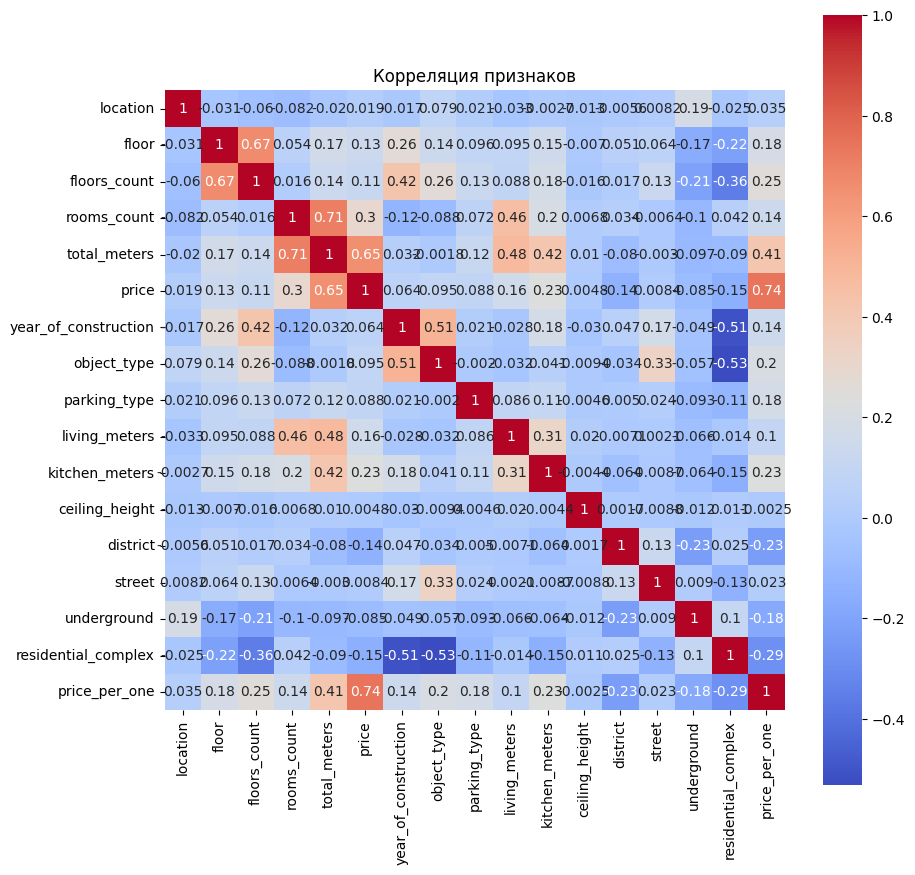

In [359]:
plt.subplots(figsize=(10, 10))
sns.heatmap(df_clean.corr(), square=True, annot=True, cmap='coolwarm')
plt.title("Корреляция признаков")
plt.show()

In [360]:
df_clean.head(20)

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,parking_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex,price_per_one
0,28,6,6,1,20.70,2350000,1917,1,2,18,1,3,232,342,328,1082,113526.570048
1,28,1,9,1,33.00,4150000,1975,1,0,18,6,3,428,160,13,1082,125757.575758
2,28,4,4,1,14.00,1700000,2006,1,0,28,10,3,114,335,328,1082,121428.571429
3,28,5,5,1,17.50,2500000,1968,1,0,28,10,3,232,1116,328,1082,142857.142857
4,28,4,7,1,25.90,3000000,2009,1,2,20,5,3,232,674,328,1082,115830.115830
5,28,2,3,1,46.70,6599999,2006,1,0,25,6,3,232,10,328,1082,141327.601713
6,28,3,5,1,29.00,3350000,1917,1,2,25,10,3,232,669,328,1082,115517.241379
7,28,3,6,1,19.10,3600000,1917,1,0,28,10,3,232,342,328,1082,188481.675393
8,28,1,2,1,27.10,1900000,1969,1,2,18,6,3,428,1430,328,1082,70110.701107
9,28,6,9,2,42.70,3990000,1980,1,2,28,10,3,232,837,328,1082,93442.622951
